# Python для анализа данных

*Ян Пиле, НИУ ВШЭ*

## Что такое анализ текстов и как с этим разобраться

В анализе данных как дисциплине существует отдельная область знания, занимающаяся анализом текстовых данных. Называется она NLP (Нет, это не нейролингвистическое программирование) == Natural Language Processing == Обработка естественного языка. NLP - область машинного обучения, дающая компьютеру возможность "понимать", анализировать, преобразовывать и  генерировать текст на человеческом языке.

**Реальные задачи NLP**

* Поиск информации (Yandex находит релевантные и похожие результаты).
* Извлечение информации (Mail структурирует события из электронных писем).
* Машинный перевод (Google Translate переводит язык с одного языка на другой).
* Упрощение текста (Rewordify упрощает смысл предложений). 
* Анализ тональности (Hater News дает нам настроение пользователя).
* Краткое изложение текста (Smry или Reddit's autotldr дает краткое изложение предложений).
* Спам-фильтр (Gmail фильтрует спам-письма).
* Прогнозирование следующих слов (поиск в Google/Yandex/Yahoo предсказывает результаты поиска пользователей).
* Автоисправление (Google Keyboard и Grammarly редактируют неправильно написанные слова).
* Распознавание речи (Алиса :)).
* Ответ на вопрос (ответы IBM Watson).
* Natural Language Generation (Генерация текста из изображения или видео.)

Мы воспользуемся модулем **TextBlob**, который представляет собой библиотеку Python и предлагает простой API для доступа к его методам и выполнения основных задач NLP. Он построен поверх модуля NLTK (Natural Language Toolkit)

 Сейчас будем устанавливать библиотеку TextBlob и всякие элементы nltk, необходимые для ее работы. Предупреждаю, это долго

In [1]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in ./anaconda3/lib/python3.8/site-packages (0.15.3)
[nltk_data] Downloading package brown to /Users/i.pile/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/i.pile/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/i.pile/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/i.pile/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/i.pile/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/i.pile/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


**Термины:**

* **Корпус** — Основная часть текста, единственное число. Корпора - множественное число.
* **Лексикон** — Слова и их значения.
* **Токен** — каждая «сущность», которая является частью того, что было разделено на основе правил. Например, каждое слово является токеном, когда предложение «токенизируется» на слова. Каждое предложение – токен, если вы токенизировали предложения из абзаца.

## Токенизация

Под токенизацией понимается разбиение большого абзаца на предложения или слова. Обычно токен – слово в текстовом документе. Токенизация с помощью TextBlob – довольно простая штука. Все, что вам нужно сделать, это импортировать объект TextBlob из библиотеки textblob, передать ему документ, который вы хотите разбить на токены и готово :). Давайте посмотрим на это в действии:

In [3]:
from textblob import TextBlob

Первый параграф из книги "Солдат всегда солдат" (к слову, интересная книга) ниже:

In [42]:
document = ("THIS is the saddest story I have ever heard. We had known the Ashburnhams \
            for nine seasons of the town of Nauheim with an extreme intimacy—or, rather with an\
            acquaintanceship as loose and easy and yet as close as a good glove's with your hand. \
            My wife and I knew Captain and Mrs Ashburnham as well as it was possible to know anybody, \
            and yet, in another sense, we knew nothing at all about them. This is, I believe, a state of \
            things only possible with English people of whom, till today, when I sit down to puzzle out \
            what I know of this sad affair, I knew nothing whatever. Six months ago I had never been to England,\
            and, certainly, I had never sounded the depths of an English heart. I had known the shallows.") 

Передадим этот документ в качестве параметра классу TextBlob. Возвращенный объект затем можно использовать для токенизации на слова и предложения.

In [43]:
text_blob_object = TextBlob(document)

In [44]:
text_blob_object[12:25]

TextBlob("Mr.Webster sa")

In [45]:
document_sentence = text_blob_object.sentences
print(document_sentence)
print(len(document_sentence))

[Sentence("THIS is the Mr.Webster saddest story I have ever heard."), Sentence("We had known the Ashburnhams             for nine seasons of the town of Nauheim with an extreme intimacy—or, rather with an            acquaintanceship as loose and easy and yet as close as a good glove's with your hand."), Sentence("My wife and I knew Captain and Mrs Ashburnham as well as it was possible to know anybody,             and yet, in another sense, we knew nothing at all about them."), Sentence("This is, I believe, a state of             things only possible with English people of whom, till today, when I sit down to puzzle out             what I know of this sad affair, I knew nothing whatever."), Sentence("Six months ago I had never been to England,            and, certainly, I had never sounded the depths of an English heart."), Sentence("I had known the shallows.")]
6


In [47]:
document_sentence[0].words

WordList(['THIS', 'is', 'the', 'Mr.Webster', 'saddest', 'story', 'I', 'have', 'ever', 'heard'])

In [48]:
document_words = text_blob_object.words

print(document_words)
print(len(document_words))

['THIS', 'is', 'the', 'Mr.Webster', 'saddest', 'story', 'I', 'have', 'ever', 'heard', 'We', 'had', 'known', 'the', 'Ashburnhams', 'for', 'nine', 'seasons', 'of', 'the', 'town', 'of', 'Nauheim', 'with', 'an', 'extreme', 'intimacy—or', 'rather', 'with', 'an', 'acquaintanceship', 'as', 'loose', 'and', 'easy', 'and', 'yet', 'as', 'close', 'as', 'a', 'good', 'glove', "'s", 'with', 'your', 'hand', 'My', 'wife', 'and', 'I', 'knew', 'Captain', 'and', 'Mrs', 'Ashburnham', 'as', 'well', 'as', 'it', 'was', 'possible', 'to', 'know', 'anybody', 'and', 'yet', 'in', 'another', 'sense', 'we', 'knew', 'nothing', 'at', 'all', 'about', 'them', 'This', 'is', 'I', 'believe', 'a', 'state', 'of', 'things', 'only', 'possible', 'with', 'English', 'people', 'of', 'whom', 'till', 'today', 'when', 'I', 'sit', 'down', 'to', 'puzzle', 'out', 'what', 'I', 'know', 'of', 'this', 'sad', 'affair', 'I', 'knew', 'nothing', 'whatever', 'Six', 'months', 'ago', 'I', 'had', 'never', 'been', 'to', 'England', 'and', 'certainly'

In [49]:
type(document_words[0])

textblob.blob.Word

In [50]:
obj = TextBlob("I'd like some coffee")
obj.words

WordList(['I', "'d", 'like', 'some', 'coffee'])

**Лемматизация**

Лемматизация – приведение слова к форме, в которой оно записано в словаре.

Чтобы выполнить лемматизацию с помощью TextBlob, вы должны использовать объект Word из библиотеки textblob, передать ему слово, которое вы хотите лемматизировать, а затем вызвать метод lemmatize.

In [52]:
from textblob import Word

word1 = Word("apples")
print("apples:", word1.lemmatize())

word2 = Word("media")
print("media:", word2.lemmatize())

word3 = Word("greater")
print("greater:", word3.lemmatize("a"))

apples: apple
media: medium
greater: great


In [53]:
word3 = Word("greater")
print("greater:", word3.lemmatize())

greater: greater


In [54]:
word2 = Word("nebulae")
print("nebulae:", word2.lemmatize())

nebulae: nebula


В приведенном выше сценарии мы выполняем лемматизацию слов «apples», «media» и «greater». В выходных данных вы видите слова «apple» (в единственном числе), «medium» (в единственном числе) и «great» (безотносительно степени, как в слове «greater»). Обратите внимание, что для слова «greater» мы передаем «a» в качестве параметра методу лемматизации. Это конкретно говорит методу, что слово следует рассматривать как прилагательное (adjective). По умолчанию метод lemmatize () слова считает слова существительными . Полный список частей речевых компонентов выглядит следующим образом:

In [14]:
ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

## Анализ частей речи aka Parts of Speech (POS) Tagging

Это лежит в атрибуте tags нашего объекта.
Что это за сокращения такие, смотреть [тут](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)

In [55]:
for word, pos in text_blob_object.tags:
    print(word + " => " + pos)

THIS => NNP
is => VBZ
the => DT
Mr.Webster => NNP
saddest => JJS
story => NN
I => PRP
have => VBP
ever => RB
heard => VBN
We => PRP
had => VBD
known => VBN
the => DT
Ashburnhams => NNP
for => IN
nine => CD
seasons => NNS
of => IN
the => DT
town => NN
of => IN
Nauheim => NNP
with => IN
an => DT
extreme => JJ
intimacy—or => NN
rather => RB
with => IN
an => DT
acquaintanceship => NN
as => IN
loose => JJ
and => CC
easy => JJ
and => CC
yet => RB
as => RB
close => RB
as => IN
a => DT
good => JJ
glove => NN
's => POS
with => IN
your => PRP$
hand => NN
My => PRP$
wife => NN
and => CC
I => PRP
knew => VBD
Captain => NNP
and => CC
Mrs => NNP
Ashburnham => NNP
as => RB
well => RB
as => IN
it => PRP
was => VBD
possible => JJ
to => TO
know => VB
anybody => NN
and => CC
yet => RB
in => IN
another => DT
sense => NN
we => PRP
knew => VBD
nothing => NN
at => IN
all => DT
about => IN
them => PRP
This => DT
is => VBZ
I => PRP
believe => VBP
a => DT
state => NN
of => IN
things => NNS
only => RB
possible =

## Преобразование текста в единственном и множественном числе

TextBlob также позволяет вам преобразовывать слова текста во множественное или единственное число, используя методы pluralize и singularize, соответственно. Пример:

In [56]:
text = ("Football is a good game. It has many health benefits")
text_blob_object = TextBlob(text)
print(text_blob_object.words.pluralize())

text = ("Footballs is a goods games. Its has many healths benefits")
text_blob_object = TextBlob(text)
print(text_blob_object.words.singularize())

['Footballs', 'iss', 'some', 'goods', 'games', 'Its', 'hass', 'manies', 'healths', 'benefitss']
['Football', 'is', 'a', 'good', 'game', 'It', 'ha', 'many', 'health', 'benefit']


In [20]:
text = ("nebula")
text_blob_object = TextBlob(text)
text_blob_object.words.pluralize()

WordList(['nebulae'])

## Подсчет количества слов и фраз

В предыдущем разделе мы использовали встроенную в Python функцию len для подсчета количества предложений, слов и словосочетаний, возвращаемых объектом TextBlob. Мы можем использовать встроенные методы TextBlob для той же цели.

Чтобы найти частоту появления конкретного слова, мы должны передать имя слова в качестве индекса в список word_counts объекта TextBlob.

In [21]:
document

"THIS is the saddest story I have ever heard. We had known the Ashburnhams             for nine seasons of the town of Nauheim with an extreme intimacy—or, rather with an            acquaintanceship as loose and easy and yet as close as a good glove's with your hand.             My wife and I knew Captain and Mrs Ashburnham as well as it was possible to know anybody,             and yet, in another sense, we knew nothing at all about them. This is, I believe, a state of             things only possible with English people of whom, till today, when I sit down to puzzle out             what I know of this sad affair, I knew nothing whatever. Six months ago I had never been to England,            and, certainly, I had never sounded the depths of an English heart. I had known the shallows."

In [57]:
text_blob_object = TextBlob(document)
text_blob_object.word_counts['i']

9

Поиск по умолчанию, как виде, регистронезависимый.

In [59]:
text_blob_object.words.count('I', case_sensitive = True)

9

## Поиск N-грамм

N-граммы – комбинации n рядом стоящих слов в предложении. Например, для предложения «Я люблю смотреть футбол» биграммы будут такие:

(я люблю), (люблю смотреть) и (смотреть футбол). N-граммы часто играют решающую роль при классификации текстов.

В TextBlob N-граммы можно найти, передав число N в метод ngrams объекта TextBlob. Пример:

In [63]:
text = "Who could ponder equations when he had a chance to imagine dragons. Never have i tried to do so."
text_blob_object = TextBlob(text)
for ngram in text_blob_object.ngrams(2):
    print(ngram)

['Who', 'could']
['could', 'ponder']
['ponder', 'equations']
['equations', 'when']
['when', 'he']
['he', 'had']
['had', 'a']
['a', 'chance']
['chance', 'to']
['to', 'imagine']
['imagine', 'dragons']
['dragons', 'Never']
['Never', 'have']
['have', 'i']
['i', 'tried']
['tried', 'to']
['to', 'do']
['do', 'so']


## Исправление орфографии

Корректировка орфографии является одной из уникальных функций библиотеки TextBlob. С помощью соответствующего метода объекта TextBlob вы можете исправить все орфографические ошибки в вашем тексте. Пример:

In [66]:
text = "I lоve to watсhrf footbal, but I have neter played it"
text_blob_object = TextBlob(text)

print(text_blob_object.correct())

I love to watсhrf football, but I have never played it


## Анализ тональности

В этом разделе мы проанализируем мнение общественности о различных продуктах, купленных через Amazon. Для этого мы будем использовать анализатор тональности TextBlob.

Набор данных можно скачать по этой [ссылке](https://www.kaggle.com/sdxingaijing/topic-model-lda-algorithm/data) .

В качестве первого шага нам нужно импортировать набор данных. Мы импортируем только первые 20 000 - слишком уж большие данные. Вы можете импортировать больше записей, если хотите. Следующий скрипт импортирует набор данных:

In [68]:
import os
os.getcwd()

'/Users/i.pile'

In [69]:
import pandas as pd

reviews_datasets = pd.read_csv('Reviews.csv')
reviews_datasets = reviews_datasets.head(20000)

In [70]:
reviews_datasets.dropna()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


Текстовый обзор о еде содержится в столбце «Text». Столбец Score содержит оценки пользователя для конкретного продукта, где 1 - самый низкий, а 5 - самый высокий рейтинг.

Давайте посмотрим распределение рейтинга:

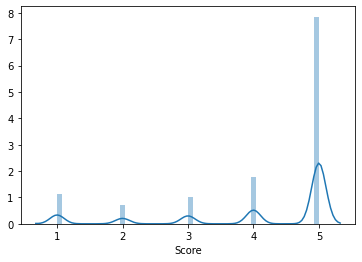

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(reviews_datasets['Score'])

Видно, что большинство рейтингов позитивные (==5). Давайте построим гистограмму для рейтингов, чтобы взглянуть на количество записей для каждого рейтинга.

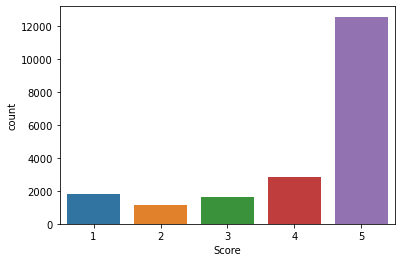

In [72]:
sns.countplot(x='Score', data=reviews_datasets)

Посмотрим глазами на произвольный отзыв

In [77]:
reviews_datasets[reviews_datasets.index==349]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
349,350,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum ""expresso bean fan""",1,1,5,1178928000,excellent - exactly what I expected,The product was exactly as advertised and fres...


Похоже, что отзыв положительный. Давайте проверим это с помощью библиотеки TextBlob. Чтобы найти тональность, мы должны использовать атрибут sentiment объекта TextBlob. Объект sentiment возвращает кортеж, который с тональностью и субъективностью отзыва.

Значение тональности может быть между -1 и 1, когда отзывы отрицательные, и тональность должна быть <0, когда же отзывы положительнеые, и тональность должна быть >0.

Значение субъективности может быть между 0 и 1. Субъективность количественно определяет долю личного мнения и фактической информации, содержащейся в тексте. Более высокая субъективность означает, что текст содержит личное мнение, а не фактическую информацию.

In [80]:
reviews_datasets['Text'][350]

'These chocolate covered espresso beans are wonderful!  The chocolate is very dark and rich and the "bean" inside is a very delightful blend of flavors with just enough caffine to really give it a zing.'

In [81]:
text_blob_object = TextBlob(reviews_datasets['Text'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.39666666666666667, subjectivity=0.6616666666666667)


Отзыв положительный с высокой субъективностью.

Давайте добавим столбец тональности в наш набор данных.

In [82]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

reviews_datasets['Sentiment_Polarity'] = reviews_datasets['Text'].apply(find_polarity)
reviews_datasets.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


Посмотрим на распределение отзывов по полярности:

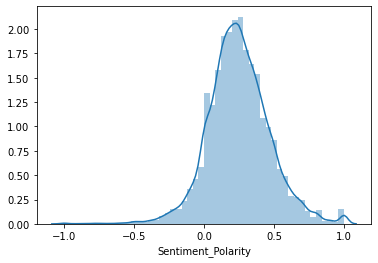

In [83]:
sns.distplot(reviews_datasets['Sentiment_Polarity'])

Из приведенного выше рисунка видно, что большинство отзывов являются положительными и имеют полярность от 0 до 0,5. Это естественно, так как большинство отзывов в наборе данных имеют 5-звездочные рейтинги.

Давайте построим среднюю полярность для каждого рейтинга.

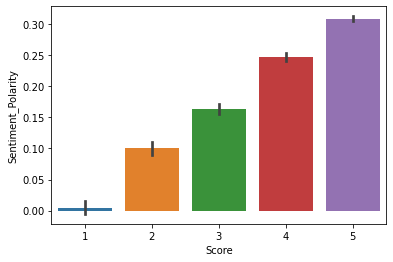

In [84]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=reviews_datasets)

Результат показывает, что отзывы с высокими баллами имеют высокую положительную полярность.

Давайте теперь посмотрим на некоторые из самых негативных отзывов, то есть на отзывы с полярностью -1.

In [85]:
most_negative = reviews_datasets[reviews_datasets.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [86]:
reviews_datasets['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

Фу, читать противно.

Посмотрим лучше на что-то позитивное:

In [87]:
most_positive = reviews_datasets[reviews_datasets.Sentiment_Polarity == 1].Text.head()
print(most_positive)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


Пункт 106 немного настораживает. Посмотрим на него внимательно:

In [88]:
reviews_datasets['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

Отзыв не слишком уж положительный, но ему была назначена полярность 1 из-за присутствия таких слов, как «excellent» и «reputation». Важно знать, что анализатор настроений не на 100% защищен от ошибок и в некоторых случаях может предсказать неверную тональность. Но и правильно предсказывать он тоже умеет :)

In [89]:
reviews_datasets['Text'][223]

'This is an excellent tea.  One of the best I have ever had.  It is especially great when you prepare it with a samovar.'

В действительности вышеизложенный Sentiment-analysis, зашитый в TextBlob, это предобученный Наивный Байесовский Классификатор (звучит сложновато и немного уничижительно, но это не страшно). Ниже ссылки-доказательства моего утверждения :) 

[Proof link StackOverflow](https://stackoverflow.com/questions/43871019/polarity-calculation-in-sentiment-analysis-using-textblob)

[Ссылка на код в TextBlob](https://github.com/sloria/TextBlob/blob/90cc87ab0f9e25f37379079840ec43aba59af440/textblob/en/sentiments.py)

[Ссылка на код в NLTK](http://www.nltk.org/_modules/nltk/classify/naivebayes.html)

Давайте разберем, что это за алгоритм такой и как он здесь используется. 

**Ссылки:**

[Условная вероятность](https://ru.wikipedia.org/wiki/Условная_вероятность#Предельная_вероятность_равна_условной_вероятности)
[Теорема Байеса](https://ru.wikipedia.org/wiki/Теорема_Байеса)
[Наивный Байесовский Классификатор](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)

А еще можно читать [тут](https://logic.pdmi.ras.ru/~sergey/teaching/mlstc12/sem01-naivebayes.pdf)
и [тут](https://towardsdatascience.com/naive-bayes-explained-9d2b96f4a9c0)

Коротко о том, что тут происходит. Наивный Байесовский классификатор помогает посчитать вероятность того, что конкретное слово окажется в положительном/отрицательном отзыве. Эта вероятность от нуля до единицы. Можно перевести ее в некую величину  от -1 до 1 (простенькое отображение) и назовем эту величину полярностью/тональностью слова - тональность 1 => вероятность найти такое слово в положительном отзыве велика, тональность = -1 => вероятность найти слово в положительном отзыве крайне мала. Теперь для каждого слова из словаря у нас есть готовая вероятность. 

После этого делается следующее:

Смотрим на новый отзыв, разбиваем его на слова. Слова могут быть:
* Известными(с известной полярностью)
* Неизвестными(если слова нет в словаре, TextBlob считает, что его вообще нет) или несущественными(TextBlob не ьерет в расчет слова типа артиклей и тд)
* Словами-модификаторами (not, very и тд)

Тональность отзыва считается так:
1. Отбрасываем все неизвестные и несущественные слова
2. Берем слова-модификаторы(их действие распространяется только на слово, идущее за ними) и с их помощью как-то меняем полярность следующего слова
3. Считаем для каждого слова-не-модификатора результирующую полярность
4. Усредняем полученную полярность для всех слов-не модификаторов. Эта усредненная оценка и будет полярностью отзыва.
5. Готово, вы восхитительны

Давайте разберем на примере

In [95]:
from textblob import TextBlob

TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

[Здесь](https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) можно посмотреть слова, по которым он это делает.

А само по себе слово great?

In [96]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [97]:
TextBlob("isn't good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Так, добавление not умножает полярность на -0.5

In [98]:
TextBlob("very good").sentiment.polarity

0.9099999999999999

А еще у некоторых слов есть свойство intensity. только что наша полярность умножилась именно на нее

In [99]:
TextBlob("not very great").sentiment

Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

Артикли и вспомогательные слова TextBlob игнорирует. А вот модификация здесь произошла хитрым образом:
    
* **polarity** = **-0.5**(not)***1/1.3**(very)***0.8**(great)
* **subjectivity** = **1/1.3**(very)***0.75**(great)

In [89]:
TextBlob("very")

TextBlob("very")

А вот этого слова нет в словаре. И поэтому ничего не происходит)

In [100]:
TextBlob("abominable").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [92]:
TextBlob("good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

Как видите, все усреднилось:

In [161]:
TextBlob("great good").sentiment

Sentiment(polarity=0.75, subjectivity=0.675)

# Non-negative Matrix Factorization

Иногда для нас может оказаться полезным еще один вид факторизации матрицы при условии, что все ее элементы неотрицательные.

[Подробнее про неотрицательную матричную факторизацию](https://arxiv.org/pdf/1401.5226.pdf)

Разберем такую задачу:
Пусть у нас есть данные с сообщениями людей на разные темы и нам заранее известен список тем сообщений. Какие слова наилучшим образом характеризуют каждую из тем?

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

Мы возьмем набор данных о дискуссиях в Usenet'e на разные тематики. Эта штука была популярной в 80-90

In [2]:
categories = ['rec.autos','talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [3]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2148,), (2148,))

Всего около 2000 записей. Посмотрим, что это за тексты:

In [5]:
print("\n".join(newsgroups_train.data[10:15]))

Toronto Siggraph 

What: ``Chance's Art'': 2D Graphics and Animation on the Indigo.

By:    Ken Evans, Imagicians Artware, Inc. 

When:  Tuesday 20 April 1993 7:00pm-9:00pm 

Where: The McLuhan Centre for Culture and Technology
       University of Toronto
       39A Queen's Park Crescent
       Toronto

Who:   Members and non-members alike 
       (non-members encouraged to become members...)

Abstract:

Imagicians Artware, Inc. is entering into early beta site testing on Silicon 
Graphics workstations of a new 2D abstract artwork and animation package called 
Chance's Art.  The package will be described and demonstrated, and some of the 
technical issues will be discussed.  Marketing plans will be outlined.  The 
talk will also present some of the technical and business problems increasingly 
confronting small startup software companies today, and some of the 
opportunities this situation presents.

Time after the event will be allocated for hands-on demonstrations to 
interested par

Темы, вроде бы, тоже довольно очевидные:

In [6]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[10:15]]

array(['comp.graphics', 'rec.autos', 'talk.religion.misc',
       'comp.graphics', 'comp.graphics'], dtype='<U18')

Ну а теперь давайте приведем наши тексты к числовому формату. Нам поможет TF-IDF.

**TF** (Term Frequency) - как часто встречается данное слово в документе (кол-во вхождение слова/кол-во слов в документе)

**IDF** (Inverse Document Frequency) - насколько "важным" является это слово. Считается ln(общее кол-во документов/кол-во документов, в которых данное слово есть)

**TF-IDF** == **TF** * **IDF** :)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) 

In [8]:
vectors_tfidf.shape

(2148, 26562)

Мы хотим выделить слова, наиболее характеризующие наши темы:

<img src="https://www.fast.ai/images/nmf_doc.png" alt="" style="width: 100%"/>

Как мы будем это делать?

Берем исходную матрицу $V$ размером $m*n$ и делаем случайную инициализацию матриц $W$ (размером $m*d$) и $H$(размером $d*n$).
Затем брать разность $V-WH$ и менять элементы $W$ и $H$ таким образом, чтобы элементы $(V-WH)^2$ стали близки к нулю. Говоря умным языком, "будем минимизировать эту разность по норме Фробениуса". (Это как квадратичная ошибка, только для матриц). 

In [9]:
vectors_tfidf.shape

(2148, 26562)

In [10]:
m,n=vectors_tfidf.shape

# Тем у нас всего 4 штуки. Комп не знает, что это за темы. А мы их по словам угадаем :)
d=4

Воспользуемся реализацией из scikit-learn. Она далеко не идеальная, но почувствовать вкус к факторизации точно поможет.

In [11]:
clf = decomposition.NMF(n_components=d, random_state=42)

W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [12]:
num_top_words=30

# Подсчитываем сколько каких слов
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() 
vectors.shape 

(2148, 26562)

Список из слов

In [13]:
vocab = np.array(vectorizer.get_feature_names())

Ну и какие же получились слова для тем?

In [14]:
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

show_topics(H1)

['god jesus people christian bible don life think just say christians did christ believe know law does morality world objective way good point make koresh children like agree moral love',
 'graphics thanks files image file know program windows format software help need looking ftp does advance mail hi gif use color code 3d anybody package available like tiff bit dos',
 'space nasa launch shuttle orbit moon lunar earth station data sci satellite gov cost mission research program dc year center science solar technology spacecraft mars rocket years billion time flight',
 'car cars like just engine dealer new good don price think speed know oil ford time buy drive really ve year miles driving right bought got problem insurance years saturn']

Может быть, это и не самые лучшие слова, но по крайней мере они ТОЧНО относятся к нашим темам и как-то их характеризуют :)